In [1]:
# 서울시의 확진자 현황 데이터를 읽어보겠습니다.

import operator
import pandas as pd

total = pd.read_csv('서울시 코로나19 확진자 현황.csv', engine='python')
total.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,107624,2021-10-09,NaN,NaN,NaN,도봉구,NaN,감염경로 조사중,NaN,-,NaN,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
1,107623,2021-10-09,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,-,NaN,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
2,107622,2021-10-09,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
3,107621,2021-10-09,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
4,107620,2021-10-09,NaN,NaN,NaN,은평구,NaN,감염경로 조사중,NaN,사망,NaN,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [3]:
# 데이터를 나타내어보니 NaN 값을 가지는 열들이 보입니다. 이 열들을 삭제하겠습니다.

total = total.drop(columns = ["환자번호", "국적", "환자정보", "조치사항", "이동경로"])
total.head()

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
0,107624,2021-10-09,도봉구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
1,107623,2021-10-09,타시도,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
2,107622,2021-10-09,성북구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
3,107621,2021-10-09,성북구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
4,107620,2021-10-09,은평구,NaN,감염경로 조사중,사망,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [4]:
# 10월 데이터를 삭제하겠습니다.

total = total[~total["확진일"].str.contains('2021-10')]
total.head()

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
6217,101407,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6218,101406,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6219,101405,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6220,101404,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6221,101403,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [5]:
# 총 확진자 수를 알아봅니다.

print(len(total))

101407


In [6]:
# 서울시 확진자만 나와 있는 데이터프레임을 만듭니다.

area_서울 = total[~total["지역"].str.contains('타시도|기타')]
area_서울

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
6222,101402,2021-09-30,강북구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6223,101401,2021-09-30,송파구,NaN,기타 확진자 접촉,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6224,101400,2021-09-30,동작구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6227,101397,2021-09-30,서대문구,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6229,101395,2021-09-30,중랑구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
...,...,...,...,...,...,...,...,...,...
107619,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107620,4,2020-01-30,마포구,중국,해외유입,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107621,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107622,2,2020-01-30,중랑구,중국,해외유입,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y


In [7]:
# 지역별로 데이터프레임을 분리합니다.

import numpy as np

area = np.unique(area_서울["지역"].values).tolist()

for i in area:
        globals()['area_{}'.format(i)] = area_서울[area_서울['지역']==i]
        
area_강동구

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
6258,101366,2021-09-30,강동구,NaN,기타 확진자 접촉,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6296,101328,2021-09-30,강동구,NaN,기타 확진자 접촉,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6335,101289,2021-09-30,강동구,NaN,기타 확진자 접촉,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6355,101269,2021-09-30,강동구,NaN,강동구 소재 고시텔 관련,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6377,101247,2021-09-30,강동구,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
...,...,...,...,...,...,...,...,...,...
107491,133,2020-03-09,강동구,필리핀,해외유입,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107553,71,2020-02-28,강동구,NaN,명성교회,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107584,40,2020-02-25,강동구,NaN,명성교회,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y
107595,29,2020-02-23,강동구,NaN,은평성모병원,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y


In [8]:
# 지역별 확진자 수를 리스트로 만듭니다.

pn =[]

pn.append(len(area_강남구))
pn.append(len(area_강동구))
pn.append(len(area_강북구))
pn.append(len(area_강서구))
pn.append(len(area_관악구))
pn.append(len(area_광진구))
pn.append(len(area_구로구))
pn.append(len(area_노원구))
pn.append(len(area_도봉구))
pn.append(len(area_동대문구))
pn.append(len(area_동작구))
pn.append(len(area_마포구))
pn.append(len(area_서대문구))
pn.append(len(area_서초구))
pn.append(len(area_성동구))
pn.append(len(area_성북구))
pn.append(len(area_송파구))
pn.append(len(area_양천구))
pn.append(len(area_영등포구))
pn.append(len(area_용산구))
pn.append(len(area_은평구))
pn.append(len(area_종로구))
pn.append(len(area_중구))
pn.append(len(area_중랑구))
pn.append(len(area_성북구))

print(pn)

[7028, 3888, 2689, 4527, 5494, 3569, 4293, 3974, 2651, 3607, 4179, 3780, 2749, 4312, 2884, 3855, 6486, 3354, 4535, 2748, 4344, 1668, 1758, 3779, 3855]


In [9]:
# 지역 리스트를 만듭니다

area = np.unique(area_서울["지역"].values).tolist()
local = []

for i in area:
    local.append(i)
    
print(local)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [10]:
# 지역과 확진자 수로 데이터프레임을 만듭니다.

local_pn = pd.DataFrame([local, pn],
                        index = ["지역","확진자 수"])
local_pn = local_pn.T
local_pn

,지역,확진자 수
0,강남구,7028
1,강동구,3888
2,강북구,2689
3,강서구,4527
4,관악구,5494
5,광진구,3569
6,구로구,4293
7,금천구,3974
8,노원구,2651
9,도봉구,3607


In [11]:
# 서울시 총 인구 데이터프레임을 불러옵니다.

all_pn = pd.read_csv('총인구.csv', engine='python')
all_pn

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.2/4,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
3,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
4,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"
5,2021.2/4,용산구,"111,650","240,665","116,858","123,807","226,378","108,948","117,430","14,287","7,910","6,377",2.03,"38,884"
6,2021.2/4,성동구,"134,542","295,767","143,927","151,840","289,162","141,042","148,120","6,605","2,885","3,720",2.15,"45,591"
7,2021.2/4,광진구,"166,957","355,306","170,624","184,682","342,481","165,233","177,248","12,825","5,391","7,434",2.05,"50,815"
8,2021.2/4,동대문구,"166,372","352,259","172,865","179,394","338,040","167,335","170,705","14,219","5,530","8,689",2.03,"61,262"
9,2021.2/4,중랑구,"185,073","394,679","194,556","200,123","389,972","192,688","197,284","4,707","1,868","2,839",2.11,"70,172"


In [12]:
# 총 합계 행을 삭제합니다.

all_pn = all_pn.drop(2)
all_pn

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
3,2021.2/4,종로구,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
4,2021.2/4,중구,"62,897","132,259","64,526","67,733","123,016","60,019","62,997","9,243","4,507","4,736",1.96,"23,980"
5,2021.2/4,용산구,"111,650","240,665","116,858","123,807","226,378","108,948","117,430","14,287","7,910","6,377",2.03,"38,884"
6,2021.2/4,성동구,"134,542","295,767","143,927","151,840","289,162","141,042","148,120","6,605","2,885","3,720",2.15,"45,591"
7,2021.2/4,광진구,"166,957","355,306","170,624","184,682","342,481","165,233","177,248","12,825","5,391","7,434",2.05,"50,815"
8,2021.2/4,동대문구,"166,372","352,259","172,865","179,394","338,040","167,335","170,705","14,219","5,530","8,689",2.03,"61,262"
9,2021.2/4,중랑구,"185,073","394,679","194,556","200,123","389,972","192,688","197,284","4,707","1,868","2,839",2.11,"70,172"
10,2021.2/4,성북구,"194,364","443,206","212,849","230,357","433,658","209,210","224,448","9,548","3,639","5,909",2.23,"73,568"


In [13]:
# 총 인구 리스트를 작성합니다.

all_pn_list = [536107, 469094, 306093, 582995, 502698, 355306, 424582, 244685, 520005, 322419, 352259, 397231, 379984, 317669, 422174, 295767, 443206, 664341, 454288, 402375, 240665, 479409, 155106, 132259, 394679]
print(all_pn_list)

[536107, 469094, 306093, 582995, 502698, 355306, 424582, 244685, 520005, 322419, 352259, 397231, 379984, 317669, 422174, 295767, 443206, 664341, 454288, 402375, 240665, 479409, 155106, 132259, 394679]


In [14]:
# 지역과 총 인구 수로 데이터프레임을 만듭니다.

all_pn_data = pd.DataFrame([local, all_pn_list],
                        index = ["지역","총 인구 수"])

all_pn_data = all_pn_data.T
all_pn_data

,지역,총 인구 수
0,강남구,536107
1,강동구,469094
2,강북구,306093
3,강서구,582995
4,관악구,502698
5,광진구,355306
6,구로구,424582
7,금천구,244685
8,노원구,520005
9,도봉구,322419


In [15]:
# 두 데이터프레임을 합칩니다.

pn_data = pd.merge(local_pn,all_pn_data, on='지역')
pn_data

,지역,확진자 수,총 인구 수
0,강남구,7028,536107
1,강동구,3888,469094
2,강북구,2689,306093
3,강서구,4527,582995
4,관악구,5494,502698
5,광진구,3569,355306
6,구로구,4293,424582
7,금천구,3974,244685
8,노원구,2651,520005
9,도봉구,3607,322419


In [16]:
# pn_data의 데이터 타입을 확인합니다.

pn_data.dtypes

지역        object
확진자 수     object
총 인구 수    object
dtype: object

In [17]:
# 확진자 비율을 계산합니다.

pn_data["확진자 비율"] = pn_data["확진자 수"] / pn_data["총 인구 수"] * 100
pd.options.display.float_format = '{:.3f}%'.format
pn_data

,지역,확진자 수,총 인구 수,확진자 비율
0,강남구,7028,536107,1.311%
1,강동구,3888,469094,0.829%
2,강북구,2689,306093,0.878%
3,강서구,4527,582995,0.777%
4,관악구,5494,502698,1.093%
5,광진구,3569,355306,1.004%
6,구로구,4293,424582,1.011%
7,금천구,3974,244685,1.624%
8,노원구,2651,520005,0.510%
9,도봉구,3607,322419,1.119%


In [20]:
# 확진자 비율이 가장 큰 행을 찾습니다.

pn_data = pn_data.astype({'확진자 비율':'float'})
pn_data["확진자 비율"].argmax()

23

In [21]:
# 가장 높은 지역부터 정렬합니다.

pn_data.sort_values(by=['확진자 비율','확진자 비율'], ascending=False).drop_duplicates(subset=['확진자 비율'], keep='first')

,지역,확진자 수,총 인구 수,확진자 비율
23,중구,3779,132259,2.857%
20,용산구,4344,240665,1.805%
7,금천구,3974,244685,1.624%
16,성북구,6486,443206,1.463%
13,서대문구,4312,317669,1.357%
0,강남구,7028,536107,1.311%
15,성동구,3855,295767,1.303%
10,동대문구,4179,352259,1.186%
22,종로구,1758,155106,1.133%
9,도봉구,3607,322419,1.119%


In [22]:
# 대푯값과 산포도에 대해 알아봅니다. (count: 총합계 / mean: 평균 / std: 표준편차 / min: 최솟값 / max: 최댓값)

pn_data.describe()

,확진자 비율
count,25.000%
mean,1.085%
std,0.508%
min,0.348%
25%,0.777%
50%,1.004%
75%,1.303%
max,2.857%


In [23]:
# 전체 데이터를 다시 불러옵니다.

total.head()

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
6217,101407,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6218,101406,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6219,101405,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6220,101404,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
6221,101403,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [24]:
# 새로운 인덱스를 만듭니다.

total = total.reset_index()
total.head()

,index,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
0,6217,101407,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
1,6218,101406,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
2,6219,101405,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
3,6220,101404,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
4,6221,101403,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [25]:
# 기존의 인덱스를 삭제합니다.

total = total.drop(columns = ["index"])
total.head()

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부
0,101407,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
1,101406,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
2,101405,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
3,101404,2021-09-30,기타,NaN,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y
4,101403,2021-09-30,기타,NaN,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y


In [26]:
# total의 데이터 타입을 알아봅니다.

total.dtypes

연번       int64
확진일     object
지역      object
여행력     object
접촉력     object
상태      object
등록일     object
수정일     object
노출여부    object
dtype: object

In [27]:
# 확진일에서 '-'이 없는 열을 작성합니다.

total["확진일"] = pd.to_datetime(total["확진일"])
total["확진일(not-)"] = total["확진일"].dt.strftime("%Y%m%d")
total[["확진일", "확진일(not-)"]].head()

,확진일,확진일(not-)
0,2021-09-30,20210930
1,2021-09-30,20210930
2,2021-09-30,20210930
3,2021-09-30,20210930
4,2021-09-30,20210930


In [28]:
# '확진일'의 데이터 타압이 datetime64[ns]형으로 바뀐 것을 알 수 있습니다.

total.dtypes

연번                    int64
확진일          datetime64[ns]
지역                   object
여행력                  object
접촉력                  object
상태                   object
등록일                  object
수정일                  object
노출여부                 object
확진일(not-)            object
dtype: object

In [29]:
# 연번을 제외한 나머지 데이터 타입을 'string'으로 바꿔줍니다.

total = total.astype('string')
total = total.astype({'연번':'int64'})

In [30]:
# 나머지 데이터 타입이 'string'으로 바뀐 것을 확인할 수 있습니다.

total.dtypes

연번            int64
확진일          string
지역           string
여행력          string
접촉력          string
상태           string
등록일          string
수정일          string
노출여부         string
확진일(not-)    string
dtype: object

In [31]:
# total 데이터를 출력합니다.

total

,연번,확진일,지역,여행력,접촉력,상태,등록일,수정일,노출여부,확진일(not-)
0,101407,2021-09-30,기타,<NA>,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y,20210930
1,101406,2021-09-30,기타,<NA>,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y,20210930
2,101405,2021-09-30,기타,<NA>,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y,20210930
3,101404,2021-09-30,기타,<NA>,감염경로 조사중,퇴원,2021-10-10 10:35:03,2021-10-10 10:35:03,Y,20210930
4,101403,2021-09-30,기타,<NA>,감염경로 조사중,-,2021-10-10 10:35:03,2021-10-10 10:35:03,Y,20210930
...,...,...,...,...,...,...,...,...,...,...
101402,5,2020-01-31,성북구,<NA>,기타 확진자 접촉,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,20200131
101403,4,2020-01-30,마포구,중국,해외유입,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,20200130
101404,3,2020-01-30,종로구,<NA>,종로구 집단발병,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,20200130
101405,2,2020-01-30,중랑구,중국,해외유입,퇴원,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,20200130


In [30]:
# to_{연도뒷자리+월} 형식으로 total 데이터 프레임을 나눕니다.

to_2001 = total[total["확진일"].str.contains('2020-01')]
to_2002 = total[total["확진일"].str.contains('2020-02')]
to_2003 = total[total["확진일"].str.contains('2020-03')]
to_2004 = total[total["확진일"].str.contains('2020-04')]
to_2005 = total[total["확진일"].str.contains('2020-05')]
to_2006 = total[total["확진일"].str.contains('2020-06')]
to_2007 = total[total["확진일"].str.contains('2020-07')]
to_2008 = total[total["확진일"].str.contains('2020-08')]
to_2009 = total[total["확진일"].str.contains('2020-09')]
to_2010 = total[total["확진일"].str.contains('2020-10')]
to_2011 = total[total["확진일"].str.contains('2020-11')]
to_2012 = total[total["확진일"].str.contains('2020-12')]
to_2101 = total[total["확진일"].str.contains('2021-01')]
to_2102 = total[total["확진일"].str.contains('2021-02')]
to_2103 = total[total["확진일"].str.contains('2021-03')]
to_2104 = total[total["확진일"].str.contains('2021-04')]
to_2105 = total[total["확진일"].str.contains('2021-05')]
to_2106 = total[total["확진일"].str.contains('2021-06')]
to_2107 = total[total["확진일"].str.contains('2021-07')]
to_2108 = total[total["확진일"].str.contains('2021-08')]
to_2109 = total[total["확진일"].str.contains('2021-09')]

In [39]:
# 2020년 12월의 총 확진자를 알아봅니다.

len(to_2012)

10432

In [40]:
# 월 리스트를 만듭니다.

month = ['2020_01', '2020_02', '2020_03', '2020_04', '2020_05', '2020_06', '2020_07', '2020_08', '2020_09', '2020_10',
        '2020_11', '2020_12', '2021_01', '2021_02', '2021_03', '2021_04', '2021_05', '2021_06', '2021_07', '2021_08', '2021_09']

In [41]:
# 각 월 확진자로 리스트를 만듭니다.

ju_num = []

ju_num.append(len(to_2001))
ju_num.append(len(to_2002))
ju_num.append(len(to_2003))
ju_num.append(len(to_2004))
ju_num.append(len(to_2005))
ju_num.append(len(to_2006))
ju_num.append(len(to_2007))
ju_num.append(len(to_2008))
ju_num.append(len(to_2009))
ju_num.append(len(to_2010))
ju_num.append(len(to_2011))
ju_num.append(len(to_2012))
ju_num.append(len(to_2101))
ju_num.append(len(to_2102))
ju_num.append(len(to_2103))
ju_num.append(len(to_2104))
ju_num.append(len(to_2105))
ju_num.append(len(to_2106))
ju_num.append(len(to_2107))
ju_num.append(len(to_2108))
ju_num.append(len(to_2109))

print(ju_num)

[7, 80, 391, 156, 229, 459, 281, 2415, 1306, 733, 2904, 10432, 4878, 4060, 3897, 5803, 6030, 6258, 14504, 15193, 21391]


In [44]:
# 연월과 확진자 수로 데이터프레임을 만듭니다.

ju_num_df = pd.DataFrame([month, ju_num],
                        index = ["연월","확진자 수"])
ju_num_df = ju_num_df.T
ju_num_df

,연월,확진자 수
0,2020_01,7
1,2020_02,80
2,2020_03,391
3,2020_04,156
4,2020_05,229
5,2020_06,459
6,2020_07,281
7,2020_08,2415
8,2020_09,1306
9,2020_10,733


In [113]:
# 연월을 'x'라는 리스트로 만들고, 확진자 수를 'y'라는 리스트로 만듭니다.

x = ju_num_df["연월"].tolist()
y = ju_num_df["확진자 수"].tolist()
print(y)

[7, 80, 391, 156, 229, 459, 281, 2415, 1306, 733, 2904, 10432, 4878, 4060, 3897, 5803, 6030, 6258, 14504, 15193, 21391]


In [172]:
# 그래프를 그리는 'matplotlib' 모듈을 불러오고 폰트를 설정합니다.

from matplotlib import font_manager, rc
font_path = "C:\\Users\\이현구\\AppData\\Local\\Microsoft\\Windows\\Fonts\\SCDream1.otf"
font_name = font_manager.FontProperties(fname=font_path).get_name()

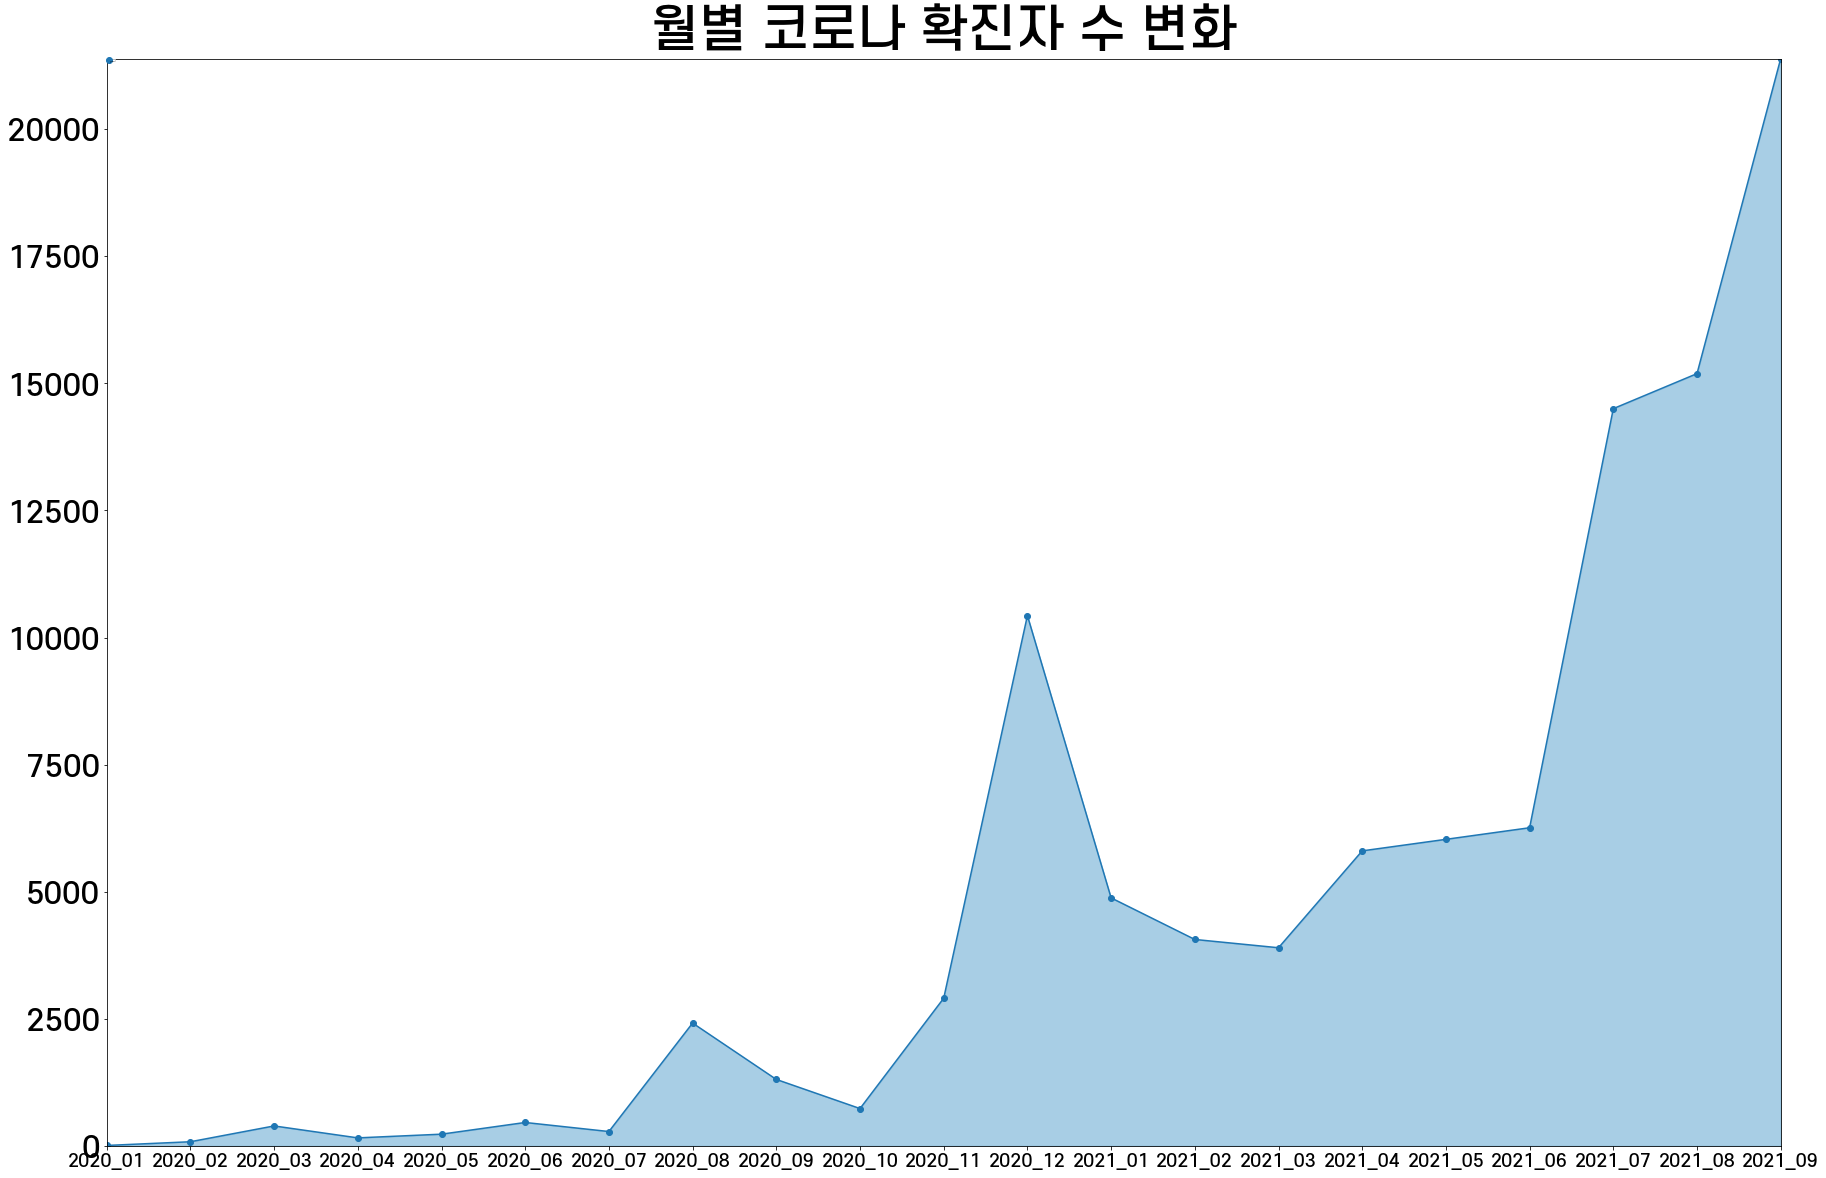

In [176]:
# 그래프를 그립니다.

import matplotlib.pyplot as plt

rc('font', family=font_name)
plt.rc('axes', titlesize=50)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=30)

plt.title('월별 코로나 확진자 수 변화')

plt.xlim([0, 20])
plt.ylim([0, 21391])
plt.rcParams['figure.figsize'] = (30, 20)

plt.plot(x, y, marker="o", label='변화 추이')
plt.fill_between(x, y, alpha=0.5, color='#539ecd')

plt.legend()